In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv


In [2]:
# Im trying to build a model that takes in the name of a cast member, director and genre and predicts weather their next project is going to be a hit or a flop.

In [3]:
df = pd.read_csv('/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv')

In [4]:
#dropping irrelevant columns
df = df.drop(['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'release_year', 'budget_adj', 'revenue_adj'], axis=1)

In [5]:
df.head()

,popularity,budget,revenue,cast,director,genres,vote_count,vote_average
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3


In [6]:
df.isnull().sum()

popularity       0
budget           0
revenue          0
cast            76
director        44
genres          23
vote_count       0
vote_average     0
dtype: int64

In [7]:
print(df['budget'].eq(0).sum(), df['revenue'].eq(0).sum())

5696 6016


In [8]:
# removing those values from the dataset where the information about budget and revenue are both absent
df = df[~(df[['budget', 'revenue']] == 0).all(axis=1)]

In [9]:
print(df['budget'].eq(0).sum(), df['revenue'].eq(0).sum())

995 1315


In [10]:
df['budget'].describe()

count    6.165000e+03
mean     2.577824e+07
std      3.737512e+07
min      0.000000e+00
25%      1.700000e+06
50%      1.200000e+07
75%      3.300000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [11]:
df['revenue'].describe()

count    6.165000e+03
mean     7.018981e+07
std      1.483194e+08
min      0.000000e+00
25%      1.184830e+05
50%      1.654948e+07
75%      7.144125e+07
max      2.781506e+09
Name: revenue, dtype: float64

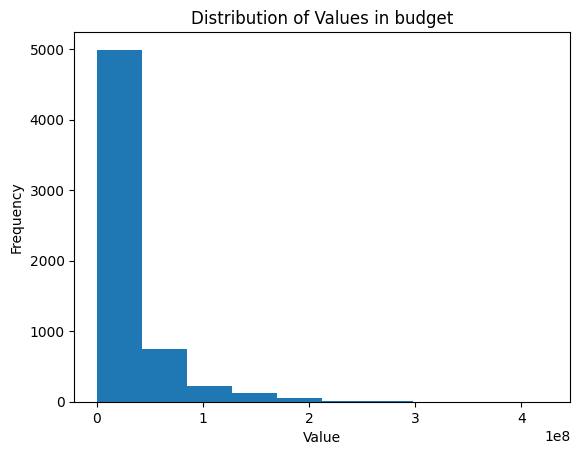

In [12]:
plt.hist(df['budget'])
plt.title('Distribution of Values in budget')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

<Axes: >

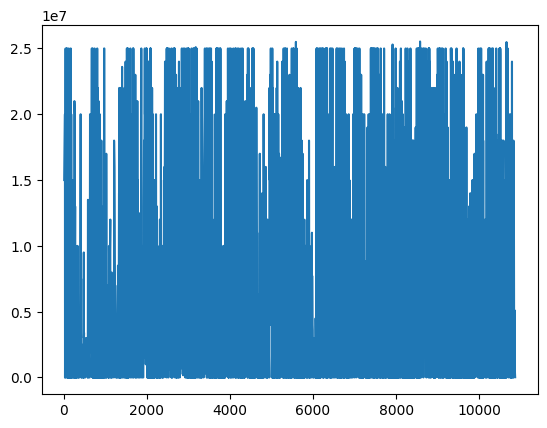

In [13]:
df[df['budget'] < 2.577824e+07]['budget'].plot.line()

In [14]:
# filling in null values for budget and revenue
# since we cannot just replace the null values with the mean of the column, we are assuming that these movies made at least as much as their budget

df['revenue'] = df.apply(lambda row: row['budget'] if row['revenue'] == 0 else row['revenue'], axis=1)
df['budget'] = df.apply(lambda row: row['revenue'] if row['budget'] == 0 else row['budget'], axis=1)


In [15]:
print(df['budget'].eq(0).sum(), df['revenue'].eq(0).sum())

0 0


In [16]:
df['profit'] = df['revenue'] / df['budget']

In [17]:
df.head()

,popularity,budget,revenue,cast,director,genres,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,10.090192
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2.522909
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2.683984
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,10.340891
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,7.927628


In [18]:
df['profit'].describe()

count    6.165000e+03
mean     1.866928e+02
std      1.300062e+04
min      2.400000e-07
25%      1.000000e+00
50%      1.000000e+00
75%      2.727273e+00
max      1.018619e+06
Name: profit, dtype: float64

In [19]:
df.loc[df['profit'] > 1.0e+06]

,popularity,budget,revenue,cast,director,genres,vote_count,vote_average,profit
10495,0.772494,113,115103979,Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,Adventure|Drama|Action|Romance|Family,211,5.8,1.018619e+06


In [20]:
# we want to remove the erroneous outliers like this one

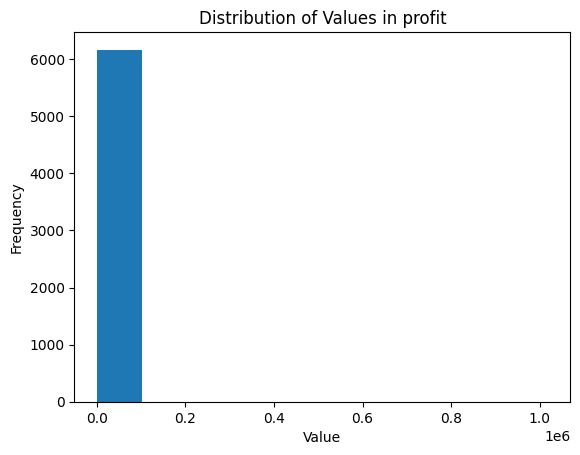

In [21]:
plt.hist(df['profit'])
plt.title('Distribution of Values in profit')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

<Axes: >

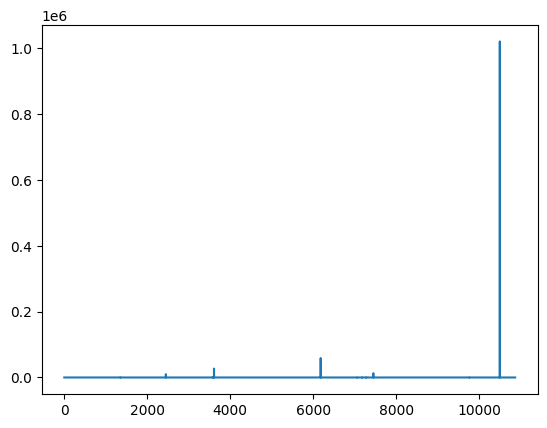

In [22]:
df['profit'].plot.line()

In [23]:
df.loc[10495, 'profit'] = 1

In [24]:
df['profit'].describe()

count    6.165000e+03
mean     2.146677e+01
std      8.489389e+02
min      2.400000e-07
25%      1.000000e+00
50%      1.000000e+00
75%      2.727273e+00
max      5.877193e+04
Name: profit, dtype: float64

In [25]:
# clipping the profit to 500 (the highest roi movie has made 5000 times its budget)
df['profit'] = df['profit'].clip(upper=500)
df = df.drop(['revenue', 'budget'], axis = 1)

In [26]:
df['profit'].describe()

count    6.165000e+03
mean     4.022804e+00
std      2.167214e+01
min      2.400000e-07
25%      1.000000e+00
50%      1.000000e+00
75%      2.727273e+00
max      5.000000e+02
Name: profit, dtype: float64

In [27]:
df.head()

,popularity,cast,director,genres,vote_count,vote_average,profit
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,10.090192
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2.522909
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2.683984
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,10.340891
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,7.927628


<Axes: >

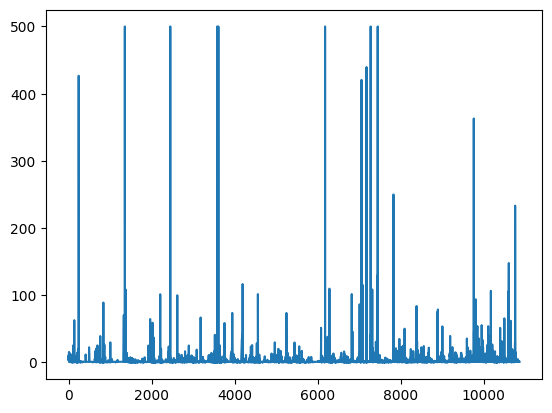

In [28]:
df['profit'].plot.line()

In [29]:
# now we have to create a label by taking in account the popularity, vote count, vote average and the profit made by the movies.
# the most influential criteria to be considered is profit, typically, a movie must make 2.5x the original budget in order to be considered profitable.

In [30]:
correlation = df[['popularity', 'vote_count', 'profit']].corr()
print(correlation)

            popularity  vote_count    profit
popularity    1.000000    0.794867  0.046307
vote_count    0.794867    1.000000  0.050348
profit        0.046307    0.050348  1.000000


In [31]:
# as we can see, the profit and popularity columns are not correlated
# we expect this to effect the future success of a project involving the same cast and crew
# we can expect the rating of a movie to also have an impact on the future success of a project by the cast and crew

In [32]:
print(df['vote_count'].describe())
print(df['vote_average'].describe())

count    6165.000000
mean      355.901217
std       733.167342
min        10.000000
25%        31.000000
50%        96.000000
75%       324.000000
max      9767.000000
Name: vote_count, dtype: float64
count    6165.000000
mean        6.038994
std         0.872593
min         1.500000
25%         5.500000
50%         6.100000
75%         6.600000
max         8.400000
Name: vote_average, dtype: float64


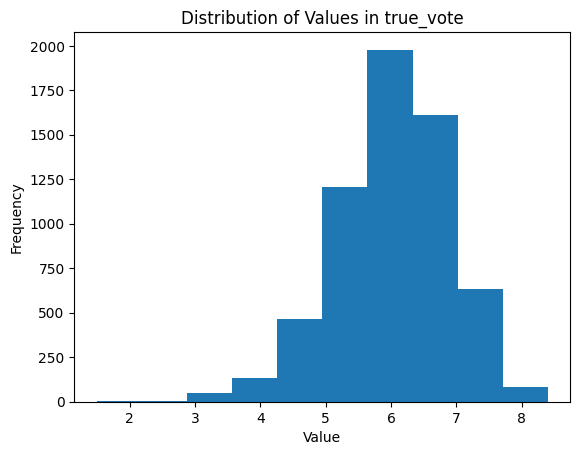

In [33]:
plt.hist(df['vote_average'])
plt.title('Distribution of Values in true_vote')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [34]:
# calculating the true rating
# we will add a reliability score to every rating on the basis of how many people actually voted for the movie
df['true_vote'] = (df['vote_average'] + (df['vote_count'] / df['vote_count'].max()))
df = df.drop(['vote_average', 'vote_count'], axis = 1)
df.head()

,popularity,cast,director,genres,profit,true_vote
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,10.090192,7.069469
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2.522909,7.733255
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2.683984,6.553916
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,10.340891,8.041825
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.927628,7.601730


In [35]:
df['true_vote'].describe()

count    6165.000000
mean        6.075433
std         0.900579
min         1.501536
25%         5.512491
50%         6.112798
75%         6.701331
max         8.989127
Name: true_vote, dtype: float64

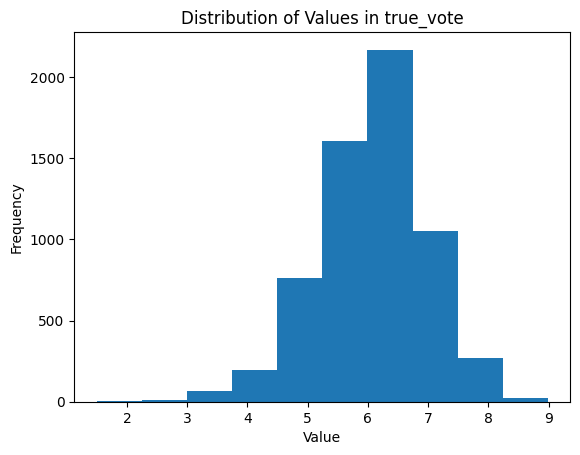

In [36]:
plt.hist(df['true_vote'])
plt.title('Distribution of Values in true_vote')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [37]:
df.head()

,popularity,cast,director,genres,profit,true_vote
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,10.090192,7.069469
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2.522909,7.733255
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2.683984,6.553916
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,10.340891,8.041825
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.927628,7.601730


In [38]:
# calculating investability 
# the profits made by a movie will effect the chances of a similar project being funded in the future
# subsequently, the amount of funding is correlated to the success of a movie
# while calculating this metric, movies will be rated from 1-10 and the movies that made a loss will be rated 0

# adjusting the profit by assuming that 25% of the budget (although some movies end up spending more money on marketing than they do on production) 
df['profit'] = df['profit'] - (df['profit'] * 0.25)

# trimming away the movies that made a loss
df['profit'] = df['profit'].apply(lambda x: 0 if x < 0 else x)

# calculating investability
df['investability'] = df['profit'] / df['profit'].max()

df = df.drop(['profit'], axis = 1)

df.head()

,popularity,cast,director,genres,true_vote,investability
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,7.069469,0.020180
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.733255,0.005046
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,6.553916,0.005368
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,8.041825,0.020682
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.601730,0.015855


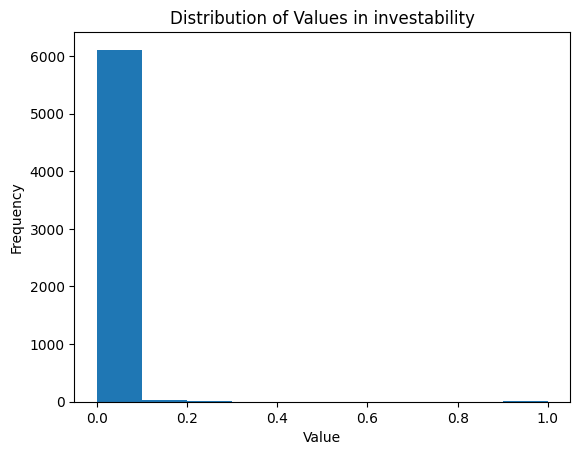

In [39]:
plt.hist(df['investability'])
plt.title('Distribution of Values in investability')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

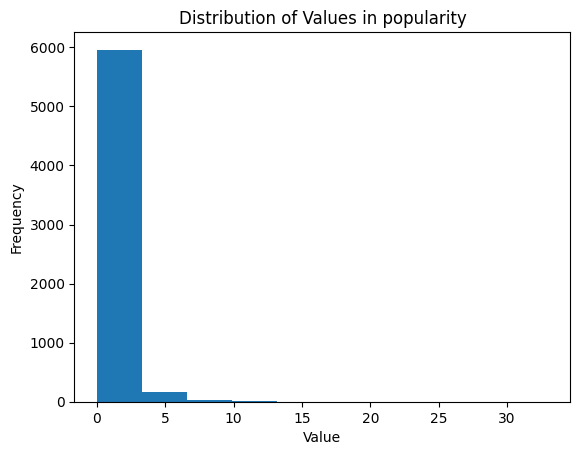

In [40]:
plt.hist(df['popularity'])
plt.title('Distribution of Values in popularity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [41]:
# squishing the popularity column down
diff = df['popularity'].max() - df['popularity'].min()
df['popularity'] = (df['popularity'] - df['popularity'].min()) / diff

df.head()

,popularity,cast,director,genres,true_vote,investability
0,1.000000,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,7.069469,0.020180
1,0.861577,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.733255,0.005046
2,0.397500,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,6.553916,0.005368
3,0.338703,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,8.041825,0.020682
4,0.282977,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.601730,0.015855


In [42]:
df['popularity'].describe()

count    6165.000000
mean        0.027536
std         0.037616
min         0.000000
25%         0.009738
50%         0.017263
75%         0.031817
max         1.000000
Name: popularity, dtype: float64

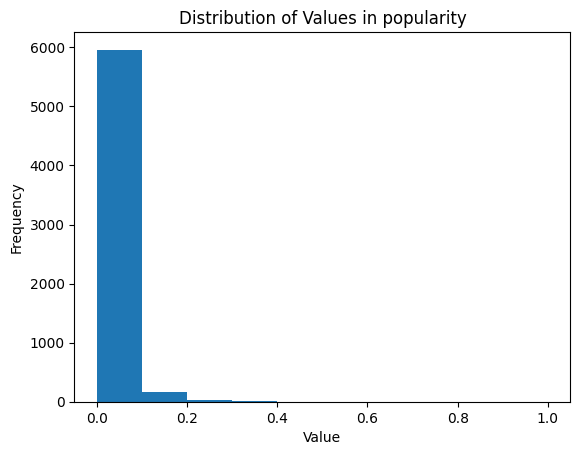

In [43]:
plt.hist(df['popularity'])
plt.title('Distribution of Values in popularity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [44]:
# now we will create our label using popularity, true_vote and investability
# assuming that popularity has a weightage of 80%, and true_vote and investability have the weightage of 10% respectively.
df['label'] = df['popularity'] * 0.8 +  df['true_vote'] * 0.1 + df['investability'] * 0.1
df = df.drop(['popularity', 'true_vote', 'investability'], axis = 1)

In [45]:
df.head()

,cast,director,genres,label
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,1.508965
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,1.463092
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,0.973928
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,1.077213
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,0.988140


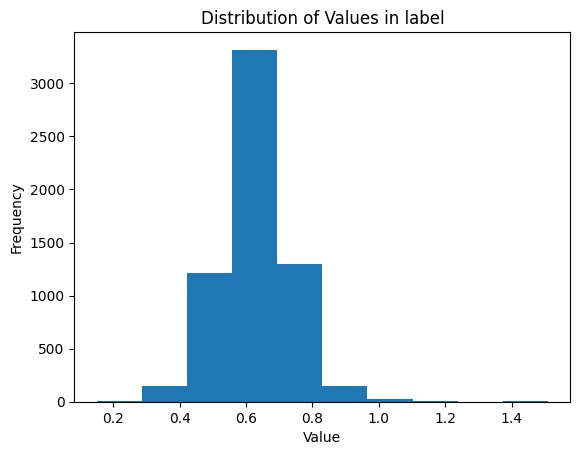

In [46]:
plt.hist(df['label'])
plt.title('Distribution of Values in label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [47]:
# separating the cast and genre names into individual entries
df['cast'] = df['cast'].str.split('|')
df['director'] = df['director'].str.split('|')
df['genres'] = df['genres'].str.split('|')

df = df.explode('cast').reset_index(drop=True)
df = df.explode('director').reset_index(drop=True)
df = df.explode('genres').reset_index(drop=True)

df.rename(columns={'genres': 'genre', 'cast': 'actor'}, inplace=True)

In [48]:
df.head()

,actor,director,genre,label
0,Chris Pratt,Colin Trevorrow,Action,1.508965
1,Chris Pratt,Colin Trevorrow,Adventure,1.508965
2,Chris Pratt,Colin Trevorrow,Science Fiction,1.508965
3,Chris Pratt,Colin Trevorrow,Thriller,1.508965
4,Bryce Dallas Howard,Colin Trevorrow,Action,1.508965


In [49]:
# extracting this dataframe for use in app

import pandas as pd

df.to_csv('output.csv', index=False)

In [50]:
df.shape

(86216, 4)

<Axes: >

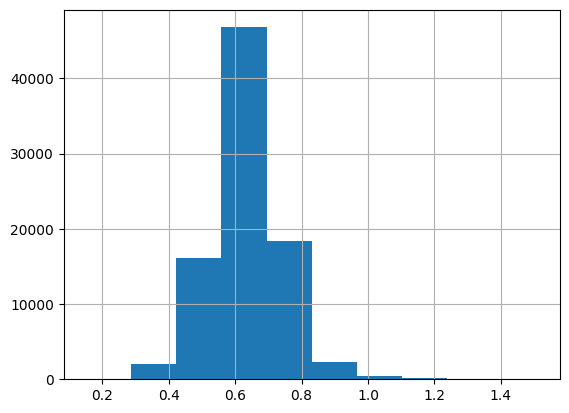

In [51]:
df['label'].hist()

In [52]:
df.loc[df['label'] > 0.5]

,actor,director,genre,label
0,Chris Pratt,Colin Trevorrow,Action,1.508965
1,Chris Pratt,Colin Trevorrow,Adventure,1.508965
2,Chris Pratt,Colin Trevorrow,Science Fiction,1.508965
3,Chris Pratt,Colin Trevorrow,Thriller,1.508965
4,Bryce Dallas Howard,Colin Trevorrow,Action,1.508965
...,...,...,...,...
86206,Dick Sargent,Alan Rafkin,Romance,0.613737
86207,Skip Homeier,Alan Rafkin,Comedy,0.613737
86208,Skip Homeier,Alan Rafkin,Family,0.613737
86209,Skip Homeier,Alan Rafkin,Mystery,0.613737


In [53]:
# encoding the categorical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['actor'] = le.fit_transform(df['actor'])
mapping_actor = dict(zip(le.classes_, range(len(le.classes_))))
df['director'] = le.fit_transform(df['director'])
mapping_director = dict(zip(le.classes_, range(len(le.classes_))))
df['genre'] = le.fit_transform(df['genre'])
mapping_genre = dict(zip(le.classes_, range(len(le.classes_))))

num_actor = len(mapping_actor)
num_director = len(mapping_director)
num_genre = len(mapping_genre)

# converting the continous label into a binary label

df['label'] = df['label'].apply(lambda x: 1 if x >= 0.5 else 0)

In [54]:
print(mapping_actor['Chris Pratt'], mapping_director['Colin Trevorrow'], mapping_genre['Action'])

1853 506 0


<Axes: >

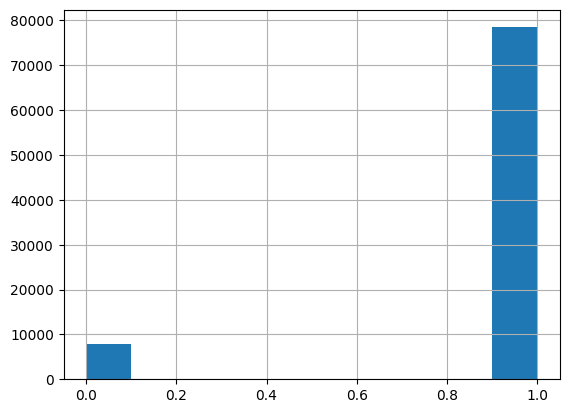

In [55]:
df['label'].hist()

In [56]:
df['label'].value_counts()

label
1    78458
0     7758
Name: count, dtype: int64

In [57]:
df.loc[df['label'] == 1]

,actor,director,genre,label
0,1853,506,0,1
1,1853,506,1,1
2,1853,506,15,1
3,1853,506,17,1
4,1444,506,0,1
...,...,...,...,...
86206,2734,54,14,1
86207,9643,54,3,1
86208,9643,54,7,1
86209,9643,54,13,1


In [58]:
print(num_actor, num_director, num_genre)

10965 2959 21


In [59]:
df.isnull().sum()

actor       0
director    0
genre       0
label       0
dtype: int64

In [60]:
# training the model

from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
X = df.drop(columns = ['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {score * 100}%')

Accuracy: 91.02876362792856%


In [63]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LogisticRegression(max_iter = 1000)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Score: {scores.mean() * 100} (+/- {scores.std() * 2})')

Cross-Validation Score: 91.00167035601193 (+/- 8.690976376194523e-05)


In [64]:
# outputting results

model.fit(X, y)

LogisticRegression(max_iter=1000)

In [65]:
actor_encoded = mapping_actor['Bryce Dallas Howard']
director_encoded = mapping_director['Colin Trevorrow']
genre_encoded = mapping_genre['Science Fiction']

input_features = [[actor_encoded, director_encoded, genre_encoded]]
probabilities = model.predict_proba(input_features)
probabilities

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.1067544, 0.8932456]])

In [66]:
# For the first input sample [1, 1, 1], the model predicts a probability of approximately 0.998 for class 1 and a probability of approximately 0.002 for class 0.

# Similarly, for the second input sample [1, 1, 2], the model predicts a probability of approximately 0.998 for class 1 and a probability of approximately 0.002 for class 0.